<a href="https://colab.research.google.com/github/SwatiBGupta1110/ML_Regression/blob/main/Gelly_Auto_CarPricePrediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A chinese automobile company GEELY Auto aspired to enter the US market by setting up their manufacturing unit there and to produce cars locally. 
The goal was to model the price of cars with the available independent variables & to determine the correlation between different variables. 
By utilizing this I drew to a conclusion of which variables are the most correlated to the price of the car. 
Lastly, I was required to predict the price of cars in the test data provided by them.

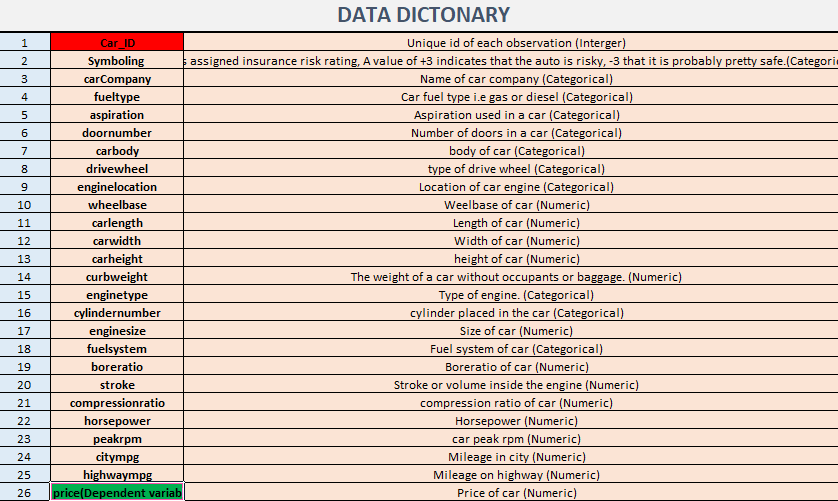

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [171]:
data=pd.read_csv("/content/sample_data/CarPrice_Assignment.csv")

In [172]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [173]:
data.shape

(205, 26)

In [174]:
data.drop(columns="car_ID",inplace=True)

In [175]:
#Lets see the datatypes in our Data
data.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [176]:
categorical_data=data.select_dtypes(include='object')
numerical_data=data.select_dtypes(exclude='object')

In [177]:
categorical_data.shape,numerical_data.shape

((205, 10), (205, 15))

In [178]:
#Checking Null values
numerical_data.isna().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [179]:
#Checking Null values
categorical_data.isna().sum()

CarName           0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
enginetype        0
cylindernumber    0
fuelsystem        0
dtype: int64

In [180]:
categorical_data.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [181]:
categorical_data["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [182]:
categorical_data["CarName"]=categorical_data["CarName"].apply(lambda car_company_name:car_company_name.split(" ")[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [183]:
categorical_data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [184]:
categorical_data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Feature Engineering:
Using Feature Reduction, Eliminating Unnecessary Features,Compressing data

In [185]:
categorical_data["CarName"].replace({"maxda":"mazda","Nissan":"nissan","porcshce":"porsche","toyouta":"toyota","vokswagen":"volkswagen"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [186]:
categorical_data.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [187]:
categorical_data_Y=pd.concat([categorical_data,Y],axis=1)

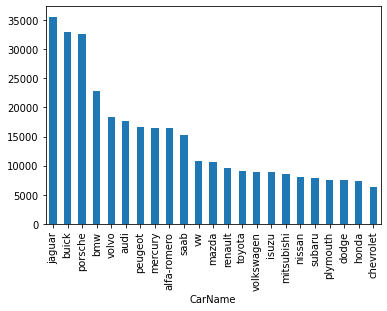

In [188]:
categorical_data_Y.groupby(by="CarName")["price"].median().sort_values(ascending=False).plot.bar()

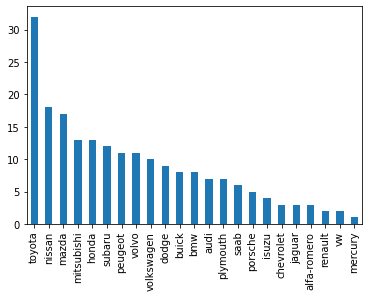

In [189]:
categorical_data["CarName"].value_counts().plot.bar()

In [190]:
high_car_price=22000
moderate_car_price=15000

In [191]:
categorical_data_Y["Car_Value"]=categorical_data_Y["price"].apply(lambda car_price: "Expensive_Car" if car_price >=high_car_price else ("Moderately_Expensive_Car" if car_price<high_car_price and car_price>=moderate_car_price  else "Economical_Car"))

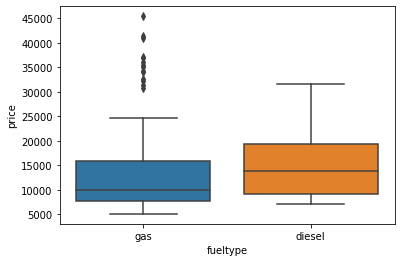

In [192]:
sns.boxplot(x="fueltype",y="price",data=categorical_data_Y)
# Car which has fuel type Diesel has greater price as compared to gas.

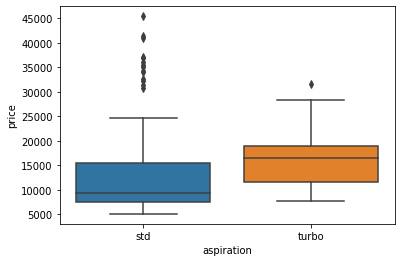

In [193]:
sns.boxplot(x="aspiration",y="price",data=categorical_data_Y)
#Turbo type has greater price than std.

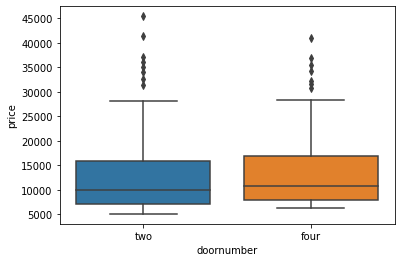

In [194]:
sns.boxplot(x="doornumber",y="price",data=categorical_data_Y)
# As the number of doors does not affect the price of Car. It is not having any linear relationship. It is not a significant feature in predicting price.
# Hence we can drop this feature

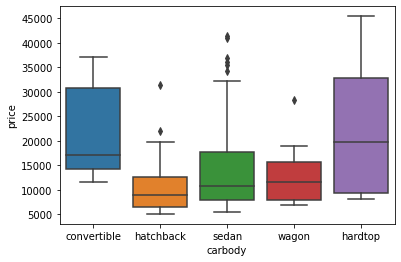

In [195]:
sns.boxplot(x="carbody",y="price",data=categorical_data_Y)

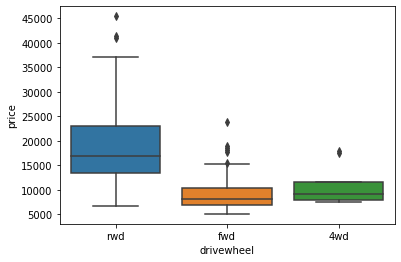

In [196]:
sns.boxplot(x="drivewheel",y="price",data=categorical_data_Y)

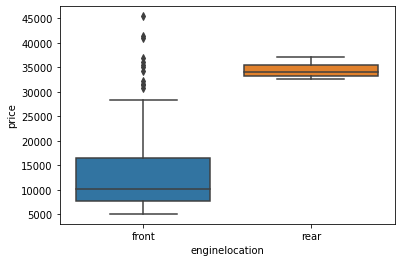

In [197]:
sns.boxplot(x="enginelocation",y="price",data=categorical_data_Y)

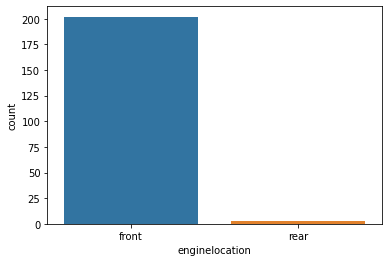

In [198]:
sns.countplot(x="enginelocation",data=categorical_data_Y)
#As enginelocation is highly biased (gretaer than 50) towards front category. Hence we need to drop it.  

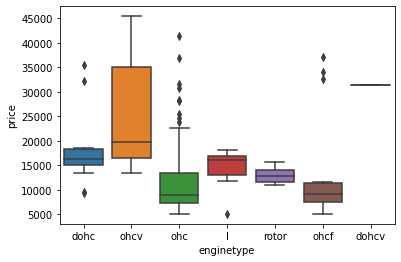

In [199]:
sns.boxplot(x="enginetype",y="price",data=categorical_data_Y)

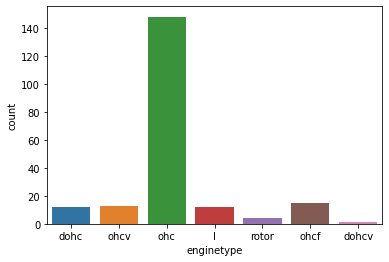

In [200]:
sns.countplot(x="enginetype",data=categorical_data_Y)

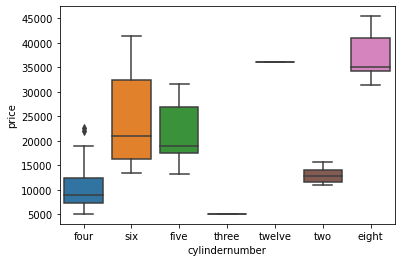

In [201]:
sns.boxplot(x="cylindernumber",y="price",data=categorical_data_Y)

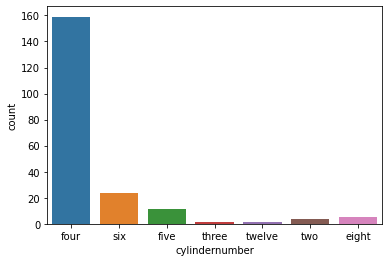

In [202]:
sns.countplot(x="cylindernumber",data=categorical_data_Y)

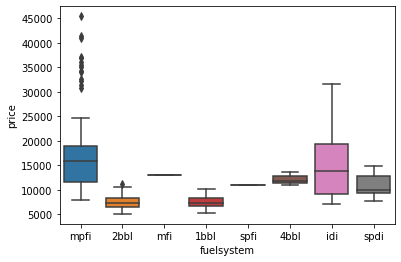

In [203]:
sns.boxplot(x="fuelsystem",y="price",data=categorical_data_Y)

In [205]:
categorical_data_Y.drop(columns=["CarName","price","enginelocation","doornumber"],inplace=True)

KeyError: ignored

In [206]:
categorical_data_Y

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,Car_Value
0,gas,std,convertible,rwd,dohc,four,mpfi,Economical_Car
1,gas,std,convertible,rwd,dohc,four,mpfi,Moderately_Expensive_Car
2,gas,std,hatchback,rwd,ohcv,six,mpfi,Moderately_Expensive_Car
3,gas,std,sedan,fwd,ohc,four,mpfi,Economical_Car
4,gas,std,sedan,4wd,ohc,five,mpfi,Moderately_Expensive_Car
...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,ohc,four,mpfi,Moderately_Expensive_Car
201,gas,turbo,sedan,rwd,ohc,four,mpfi,Moderately_Expensive_Car
202,gas,std,sedan,rwd,ohcv,six,mpfi,Moderately_Expensive_Car
203,diesel,turbo,sedan,rwd,ohc,six,idi,Expensive_Car


In [207]:
dummy_categorical_data=pd.get_dummies(categorical_data_Y,drop_first=True)
dummy_categorical_data.shape

(205, 29)

In [208]:
dummy_categorical_data

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Car_Value_Expensive_Car,Car_Value_Moderately_Expensive_Car
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
201,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
202,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
203,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [209]:
from sklearn.preprocessing import MinMaxScaler

In [210]:
min_max_scaler=MinMaxScaler()

In [211]:
Y=numerical_data["price"]
numerical_data.drop(columns=["price"],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [212]:
numerical_data_scaled=min_max_scaler.fit_transform(numerical_data)


In [213]:
numerical_data=pd.DataFrame(numerical_data_scaled,columns=numerical_data.columns)



In [214]:
numerical_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789
201,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842
202,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211
203,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474


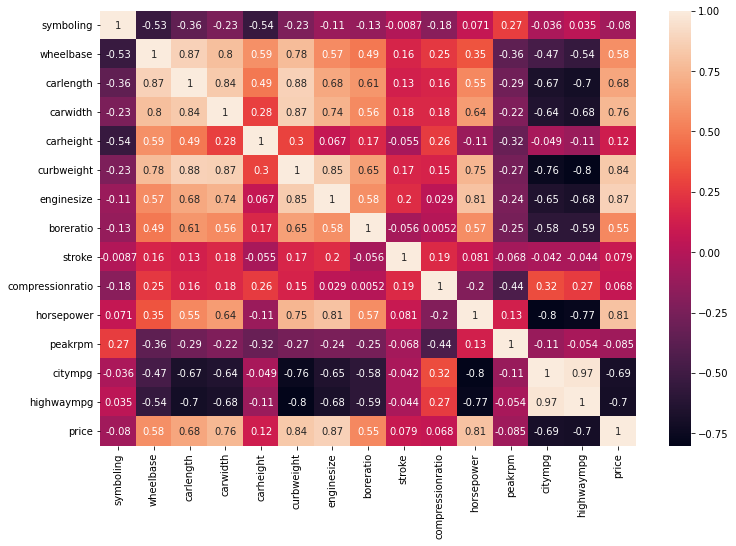

In [215]:

plt.figure(figsize=(12,8))
sns.heatmap(pd.concat([numerical_data,Y],axis=1).corr(),annot=True)
plt.show()

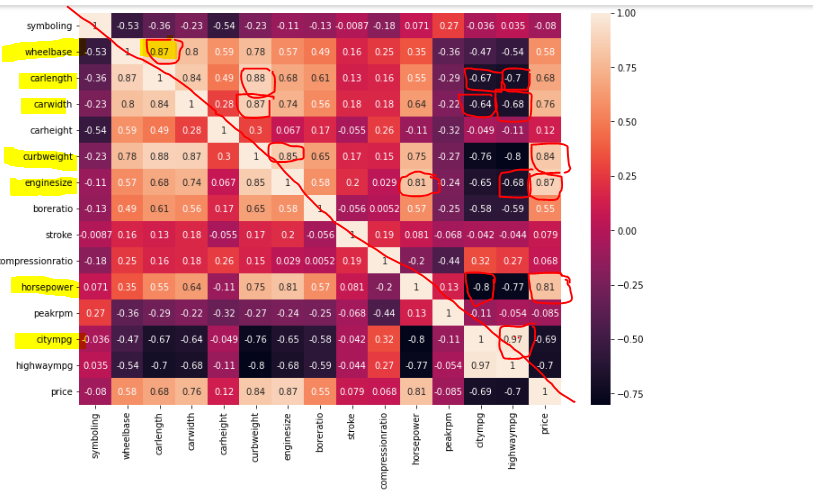

Dropping above columns as High multicollinearity.

In [216]:
numerical_data=numerical_data.drop(columns=["wheelbase", "carlength","carwidth", "curbweight", "enginesize", "horsepower","citympg"])

In [222]:
scaled_data=pd.concat([dummy_categorical_data,numerical_data,Y],axis=1)
scaled_data#.drop(columns="price")


,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Car_Value_Expensive_Car,Car_Value_Moderately_Expensive_Car,symboling,carheight,boreratio,stroke,compressionratio,peakrpm,highwaympg,price
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,0.083333,0.664286,0.290476,0.12500,0.346939,0.289474,13495.0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0,0.083333,0.664286,0.290476,0.12500,0.346939,0.289474,16500.0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.6,0.383333,0.100000,0.666667,0.12500,0.346939,0.263158,16500.0
3,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.8,0.541667,0.464286,0.633333,0.18750,0.551020,0.368421,13950.0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.8,0.541667,0.464286,0.633333,0.06250,0.551020,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.2,0.641667,0.885714,0.514286,0.15625,0.510204,0.315789,16845.0
201,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.2,0.641667,0.885714,0.514286,0.10625,0.469388,0.236842,19045.0
202,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.2,0.641667,0.742857,0.380952,0.11250,0.551020,0.184211,21485.0
203,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0.2,0.641667,0.335714,0.633333,1.00000,0.265306,0.289474,22470.0


In [223]:
scaled_data.shape

(205, 37)

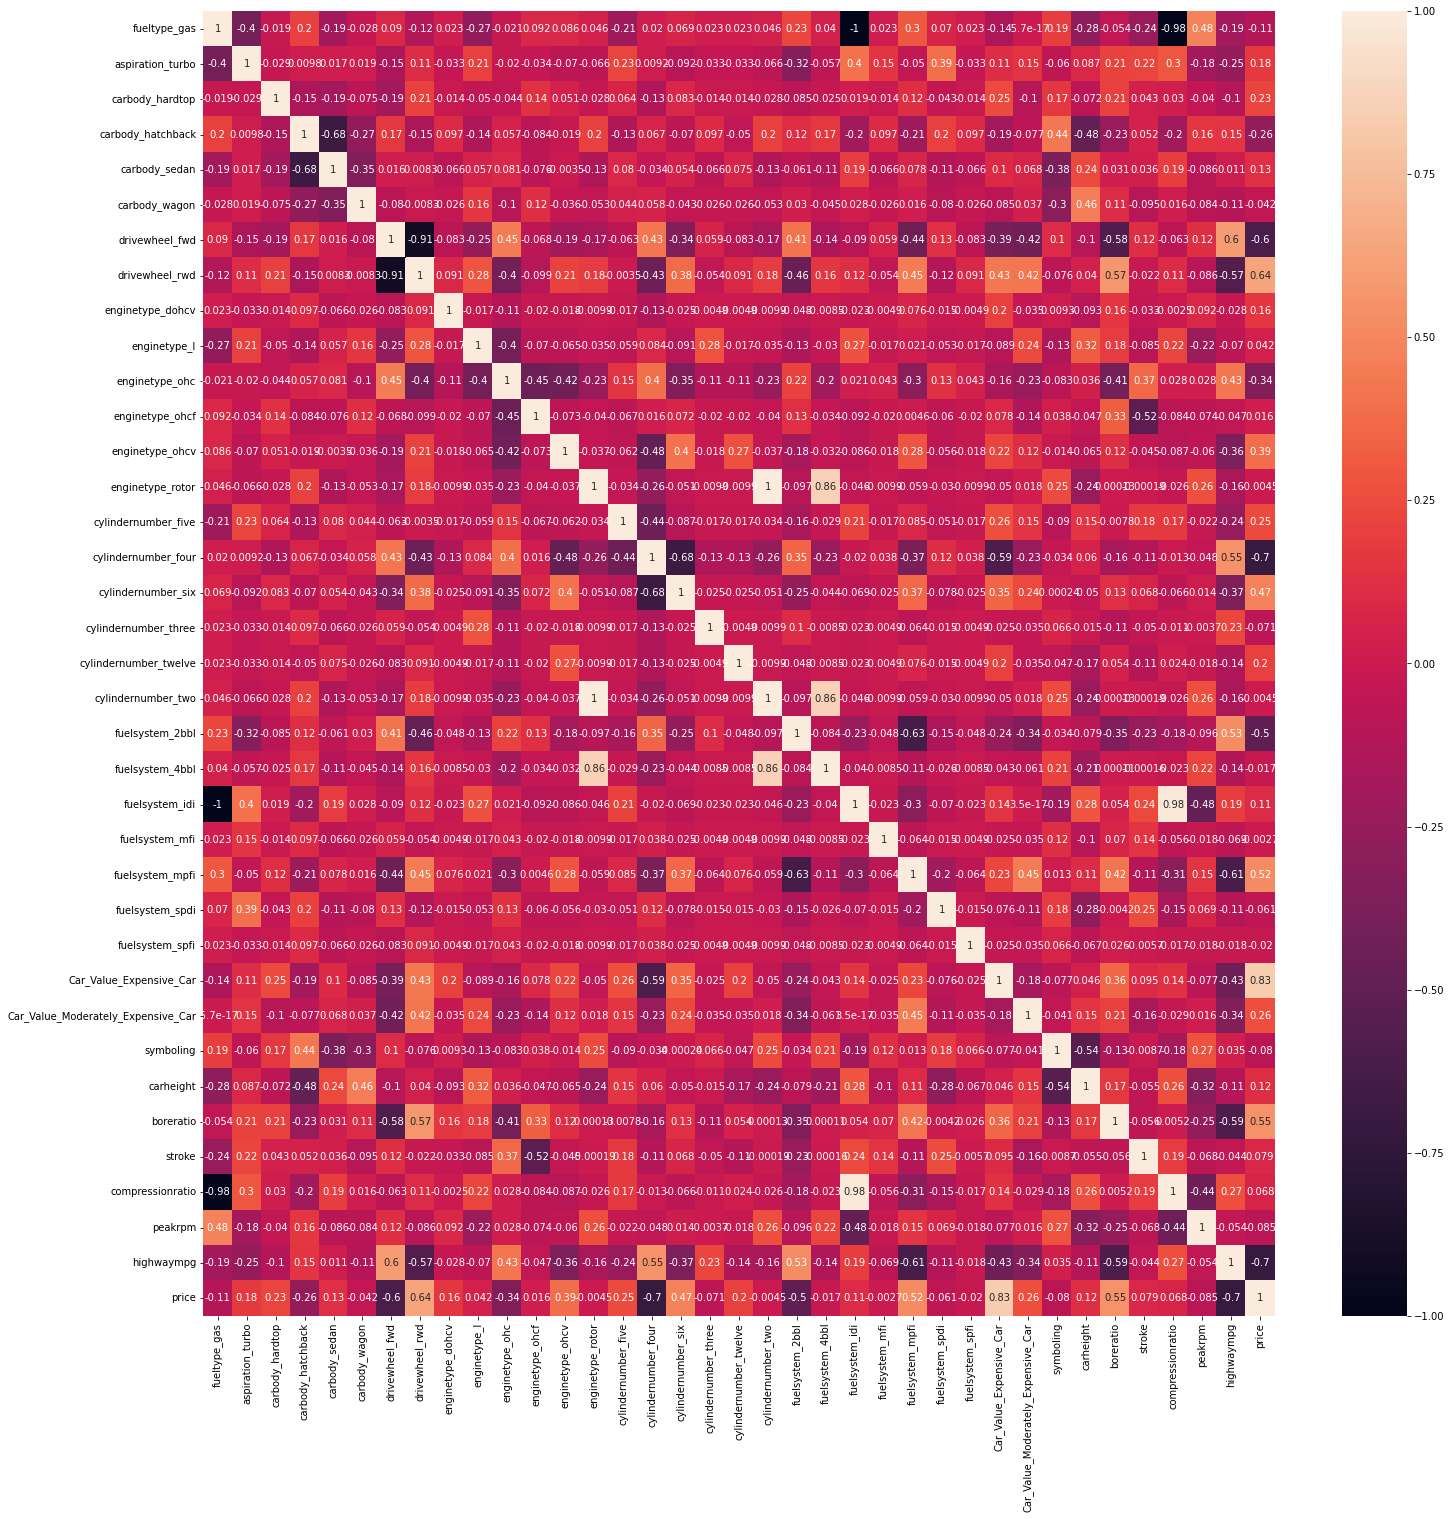

In [224]:
#Plotting Heatmap

plt.figure(figsize=(24,24))
sns.heatmap(scaled_data.corr(),annot=True)
plt.show()

In [225]:
scaled_data

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Car_Value_Expensive_Car,Car_Value_Moderately_Expensive_Car,symboling,carheight,boreratio,stroke,compressionratio,peakrpm,highwaympg,price
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,0.083333,0.664286,0.290476,0.12500,0.346939,0.289474,13495.0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0,0.083333,0.664286,0.290476,0.12500,0.346939,0.289474,16500.0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.6,0.383333,0.100000,0.666667,0.12500,0.346939,0.263158,16500.0
3,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.8,0.541667,0.464286,0.633333,0.18750,0.551020,0.368421,13950.0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.8,0.541667,0.464286,0.633333,0.06250,0.551020,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.2,0.641667,0.885714,0.514286,0.15625,0.510204,0.315789,16845.0
201,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.2,0.641667,0.885714,0.514286,0.10625,0.469388,0.236842,19045.0
202,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.2,0.641667,0.742857,0.380952,0.11250,0.551020,0.184211,21485.0
203,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0.2,0.641667,0.335714,0.633333,1.00000,0.265306,0.289474,22470.0


In [226]:
X=scaled_data.drop(columns="price",axis=0)
y=scaled_data["price"]

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [236]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [237]:
model_lm= LinearRegression()


In [238]:
model_lm.fit(X_train,y_train)
rfe=RFE(estimator=model_lm,n_features_to_select=10)
rfe=rfe.fit(X_train,y_train)


In [241]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 20),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', False, 12),
 ('carbody_sedan', False, 14),
 ('carbody_wagon', False, 13),
 ('drivewheel_fwd', False, 24),
 ('drivewheel_rwd', False, 16),
 ('enginetype_dohcv', False, 5),
 ('enginetype_l', False, 21),
 ('enginetype_ohc', False, 22),
 ('enginetype_ohcf', False, 11),
 ('enginetype_ohcv', False, 15),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 26),
 ('cylindernumber_twelve', False, 8),
 ('cylindernumber_two', False, 2),
 ('fuelsystem_2bbl', False, 18),
 ('fuelsystem_4bbl', False, 3),
 ('fuelsystem_idi', False, 7),
 ('fuelsystem_mfi', False, 27),
 ('fuelsystem_mpfi', False, 10),
 ('fuelsystem_spdi', False, 25),
 ('fuelsystem_spfi', False, 9),
 ('Car_Value_Expensive_Car', True, 1),
 ('Car_Value_Moderately_Expensive_Car', True, 1),
 ('symboling', False, 2

In [242]:
top_features_10=X_train.columns[rfe.support_]
top_features_10

Index(['fueltype_gas', 'carbody_hardtop', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'Car_Value_Expensive_Car', 'Car_Value_Moderately_Expensive_Car',
       'compressionratio', 'highwaympg'],
      dtype='object')

In [243]:
X_train_top_10=X_train[top_features_10]

In [246]:
import statsmodels.api as sm
X_train_top_10=sm.add_constant(X_train_top_10)
ols_model=sm.OLS(y_train,X_train_top_10).fit()
print(ols_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     195.9
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           4.59e-74
Time:                        16:39:43   Log-Likelihood:                -1287.1
No. Observations:                 143   AIC:                             2596.
Df Residuals:                     132   BIC:                             2629.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [247]:
ols_model.params

const                                 31377.011434
fueltype_gas                          -8365.613881
carbody_hardtop                        5484.318208
enginetype_rotor                      -7970.140882
cylindernumber_five                   -7863.942186
cylindernumber_four                   -8144.129054
cylindernumber_six                    -6070.415408
Car_Value_Expensive_Car               14309.428999
Car_Value_Moderately_Expensive_Car     5606.212491
compressionratio                      -6914.465995
highwaympg                           -11737.619235
dtype: float64

In [248]:
#Evaulating OLS model

y_train_pred=ols_model.predict(X_train_top_10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


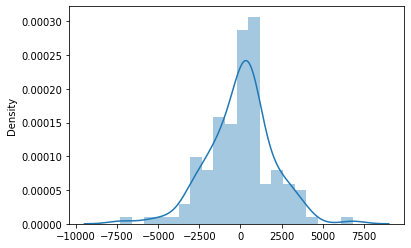

In [252]:
#We made one assumption while reading LinearRegression the error between y_pred and y_true should be a bell curve or Normal Distribution unction ie.e. mean=0

sns.distplot(y_train_pred-y_train,bins=20)

In [253]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r_squared=r2_score(y_train,y_train_pred)
print("r_squared ",r_squared)

mse=mean_squared_error(y_train,y_train_pred)
print("mean_squared_error ",mse)

rmse=mean_squared_error(y_train,y_train_pred,squared=False)
print("root_mean_squared_error ",rmse)

mae=mean_absolute_error(y_train,y_train_pred)
print("mean_absolute_error ",mae)

r_squared  0.936880488017721
mean_squared_error  3847110.0912498827
root_mean_squared_error  1961.4051318506033
mean_absolute_error  1450.904579786771


In [254]:
X_test_top_10=X_test[top_features_10]

In [256]:
X_test_top_10=sm.add_constant(X_test_top_10)

In [257]:
y_test_pred=ols_model.predict(X_test_top_10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


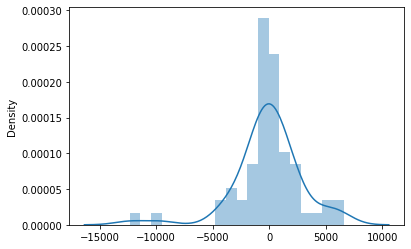

In [258]:
sns.distplot(y_test_pred-y_test,bins=20)

In [259]:
r_squared=r2_score(y_test,y_test_pred)
print("r_squared ",r_squared)

mse=mean_squared_error(y_test,y_test_pred)
print("mean_squared_error ",mse)

rmse=mean_squared_error(y_test,y_test_pred,squared=False)
print("root_mean_squared_error ",rmse)

mae=mean_absolute_error(y_test,y_test_pred)
print("mean_absolute_error ",mae)

#As we can clearly see that difference between r_squared in Train and r_squared in Test is >5. Model has overfitted. 
#The error metrics also show that test error is greater than trin error.


r_squared  0.8686780490505991
mean_squared_error  9098559.76954989
root_mean_squared_error  3016.381900481086
mean_absolute_error  1994.4017381886022


In [260]:
#Lets now implement using LinearRegressionFunction
model_lm_1=LinearRegression()

model_lm_1.fit(X_train_top_10,y_train)

LinearRegression()

In [261]:
y_train_pred_1=model_lm_1.predict(X_train_top_10)
y_test_pred_1=model_lm_1.predict(X_test_top_10)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


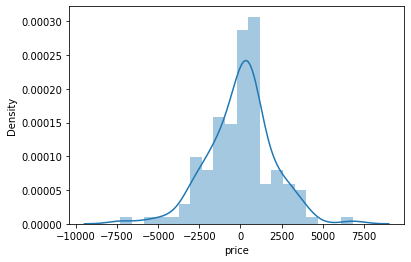

In [262]:
sns.distplot(y_train_pred_1-y_train,bins=20)

In [265]:
r_squared=r2_score(y_train,y_train_pred_1)
print("r_squared ",r_squared)

mse=mean_squared_error(y_train,y_train_pred_1)
print("mean_squared_error ",mse)

rmse=mean_squared_error(y_train,y_train_pred_1,squared=False)
print("root_mean_squared_error ",rmse)

mae=mean_absolute_error(y_train,y_train_pred_1)
print("mean_absolute_error ",mae)

r_squared  0.936880488017721
mean_squared_error  3847110.0912498827
root_mean_squared_error  1961.4051318506033
mean_absolute_error  1450.904579786776


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


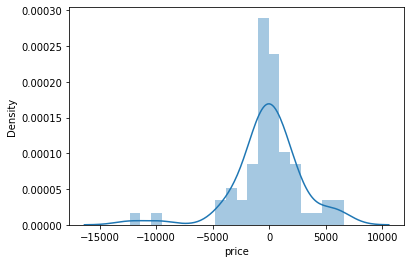

In [263]:
sns.distplot(y_test_pred_1-y_test,bins=20)

In [266]:
r_squared=r2_score(y_test,y_test_pred_1)
print("r_squared ",r_squared)

mse=mean_squared_error(y_test,y_test_pred_1)
print("mean_squared_error ",mse)

rmse=mean_squared_error(y_test,y_test_pred_1,squared=False)
print("root_mean_squared_error ",rmse)

mae=mean_absolute_error(y_test,y_test_pred_1)
print("mean_absolute_error ",mae)

r_squared  0.868678049050599
mean_squared_error  9098559.769549899
root_mean_squared_error  3016.3819004810875
mean_absolute_error  1994.4017381886


In [ ]:
# We need to implement Lasso and Ridge